# Classification with stumbleupon data

Project 4 has been changed since scraping was untenable. The project now focuses on the stumbleupon kaggle dataset. For more information on this dataset, [check out the website here](https://www.kaggle.com/c/stumbleupon).

---

## 1. Load in the dataset

This is the only part completed for you.

---

In [279]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

sns.set_style('white')

%matplotlib inline

In [280]:
su = pd.read_csv('../dataset/evergreen.tsv', delimiter='\t')

## 2. Clean up/examine your data

Some of the columns may have values that need changing or that are of the wrong type. There could also be columns that aren't very useful.

---

In [281]:
su.dtypes

url                                object
urlid                               int64
boilerplate                        object
alchemy_category                   object
alchemy_category_score             object
avglinksize                       float64
commonlinkratio_1                 float64
commonlinkratio_2                 float64
commonlinkratio_3                 float64
commonlinkratio_4                 float64
compression_ratio                 float64
embed_ratio                       float64
framebased                          int64
frameTagRatio                     float64
hasDomainLink                       int64
html_ratio                        float64
image_ratio                       float64
is_news                            object
lengthyLinkDomain                   int64
linkwordscore                       int64
news_front_page                    object
non_markup_alphanum_characters      int64
numberOfLinks                       int64
numwords_in_url                   

In [282]:
su.describe()

,urlid,avglinksize,commonlinkratio_1,commonlinkratio_2,commonlinkratio_3,commonlinkratio_4,compression_ratio,embed_ratio,framebased,frameTagRatio,...,html_ratio,image_ratio,lengthyLinkDomain,linkwordscore,non_markup_alphanum_characters,numberOfLinks,numwords_in_url,parametrizedLinkRatio,spelling_errors_ratio,label
count,7395.000000,7395.000000,7395.000000,7395.000000,7395.000000,7395.000000,7395.000000,7395.000000,7395.0,7395.000000,...,7395.000000,7395.000000,7395.000000,7395.000000,7395.000000,7395.000000,7395.000000,7395.000000,7395.000000,7395.000000
mean,5305.704665,2.761823,0.468230,0.214080,0.092062,0.049262,2.255103,-0.103750,0.0,0.056423,...,0.233778,0.275709,0.660311,30.077079,5716.598242,178.754564,4.960649,0.172864,0.101221,0.513320
std,3048.384114,8.619793,0.203133,0.146743,0.095978,0.072629,5.704313,0.306545,0.0,0.041446,...,0.052487,1.919320,0.473636,20.393101,8875.432430,179.466198,3.233111,0.183286,0.079231,0.499856
min,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,-1.000000,0.0,0.000000,...,0.045564,-1.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000
25%,2688.500000,1.602062,0.340370,0.105263,0.022222,0.000000,0.442616,0.000000,0.0,0.028502,...,0.201061,0.025900,0.000000,14.000000,1579.000000,82.000000,3.000000,0.040984,0.068739,0.000000
50%,5304.000000,2.088235,0.481481,0.202454,0.068627,0.022222,0.483680,0.000000,0.0,0.045775,...,0.230564,0.083051,1.000000,25.000000,3500.000000,139.000000,5.000000,0.113402,0.089312,1.000000
75%,7946.500000,2.627451,0.616604,0.300000,0.133333,0.065065,0.578227,0.000000,0.0,0.073459,...,0.260770,0.236700,1.000000,43.000000,6377.000000,222.000000,7.000000,0.241299,0.112376,1.000000
max,10566.000000,363.000000,1.000000,1.000000,0.980392,0.980392,21.000000,0.250000,0.0,0.444444,...,0.716883,113.333333,1.000000,100.000000,207952.000000,4997.000000,22.000000,1.000000,1.000000,1.000000


In [283]:
su.head()

,url,urlid,boilerplate,alchemy_category,alchemy_category_score,avglinksize,commonlinkratio_1,commonlinkratio_2,commonlinkratio_3,commonlinkratio_4,...,is_news,lengthyLinkDomain,linkwordscore,news_front_page,non_markup_alphanum_characters,numberOfLinks,numwords_in_url,parametrizedLinkRatio,spelling_errors_ratio,label
0,http://www.bloomberg.com/news/2010-12-23/ibm-p...,4042,"{""title"":""IBM Sees Holographic Calls Air Breat...",business,0.789131,2.055556,0.676471,0.205882,0.047059,0.023529,...,1,1,24,0,5424,170,8,0.152941,0.079130,0
1,http://www.popsci.com/technology/article/2012-...,8471,"{""title"":""The Fully Electronic Futuristic Star...",recreation,0.574147,3.677966,0.508021,0.288770,0.213904,0.144385,...,1,1,40,0,4973,187,9,0.181818,0.125448,1
2,http://www.menshealth.com/health/flu-fighting-...,1164,"{""title"":""Fruits that Fight the Flu fruits tha...",health,0.996526,2.382883,0.562016,0.321705,0.120155,0.042636,...,1,1,55,0,2240,258,11,0.166667,0.057613,1
3,http://www.dumblittleman.com/2007/12/10-foolpr...,6684,"{""title"":""10 Foolproof Tips for Better Sleep ""...",health,0.801248,1.543103,0.400000,0.100000,0.016667,0.000000,...,1,0,24,0,2737,120,5,0.041667,0.100858,1
4,http://bleacherreport.com/articles/1205138-the...,9006,"{""title"":""The 50 Coolest Jerseys You Didn t Kn...",sports,0.719157,2.676471,0.500000,0.222222,0.123457,0.043210,...,1,1,14,0,12032,162,10,0.098765,0.082569,0


In [284]:
#check non-numeric variables and decide what to make them

for item in su:
    if su[item].dtype == 'object':
        print item
        print su[item].nunique()
print 
print su['alchemy_category'].value_counts() #14 variables
print su['is_news'].value_counts() #binary wil nulls
print su['news_front_page'].value_counts() #binary nulls
#alchemy_category_score to float

url
7395
boilerplate
7394
alchemy_category
14
alchemy_category_score
4806
is_news
2
news_front_page
3

?                     2342
recreation            1229
arts_entertainment     941
business               880
health                 506
sports                 380
culture_politics       343
computer_internet      296
science_technology     289
gaming                  76
religion                72
law_crime               31
unknown                  6
weather                  4
Name: alchemy_category, dtype: int64
1    4552
?    2843
Name: is_news, dtype: int64
0    5853
?    1248
1     294
Name: news_front_page, dtype: int64


In [285]:
# drop variables where every line is unique
su = su.drop('url', axis=1)
su = su.drop('urlid', axis=1)
su = su.drop('boilerplate', axis=1)

In [286]:
#numerize non-numeric variables (except alchemy_category)
# 'alchemy_category' #14 variables
# 'is_news' #binary w nulls
# 'news_front_page' #binary w nulls
# alchemy_category_score to float

su['alchemy_category_score'] = pd.to_numeric(su['alchemy_category_score'], errors='coerce')

su['is_news'].replace(to_replace='1', value=1, inplace=True)
su['is_news'].replace(to_replace='?', value=0, inplace=True)
su['is_news'] = pd.to_numeric(su['is_news'], errors='coerce')

su['news_front_page'].replace(to_replace='1', value=1, inplace=True)
su['news_front_page'].replace(to_replace='0', value=0, inplace=True)
su['news_front_page'].replace(to_replace='?', value=0, inplace=True)
su['news_front_page'] = pd.to_numeric(su['news_front_page'], errors='coerce')


In [287]:
su.std()

alchemy_category_score               0.212864
avglinksize                          8.619793
commonlinkratio_1                    0.203133
commonlinkratio_2                    0.146743
commonlinkratio_3                    0.095978
commonlinkratio_4                    0.072629
compression_ratio                    5.704313
embed_ratio                          0.306545
framebased                           0.000000
frameTagRatio                        0.041446
hasDomainLink                        0.144162
html_ratio                           0.052487
image_ratio                          1.919320
is_news                              0.486498
lengthyLinkDomain                    0.473636
linkwordscore                       20.393101
news_front_page                      0.195400
non_markup_alphanum_characters    8875.432430
numberOfLinks                      179.466198
numwords_in_url                      3.233111
parametrizedLinkRatio                0.183286
spelling_errors_ratio             

In [288]:
# delete variables 0 std dev
su = su.drop('framebased', axis=1)

In [289]:
# import seaborn as sns 

# sns.pairplot(su)

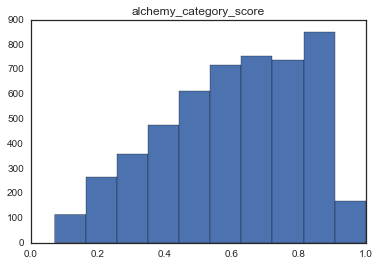

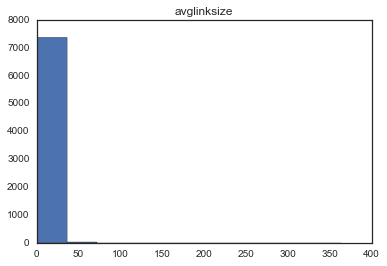

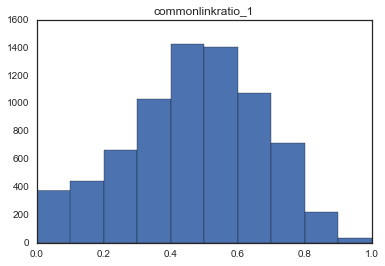

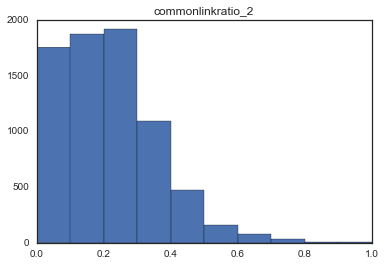

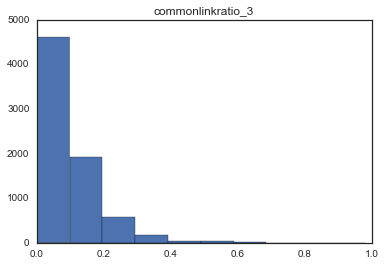

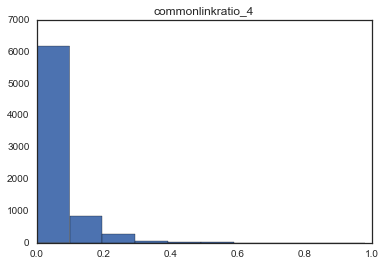

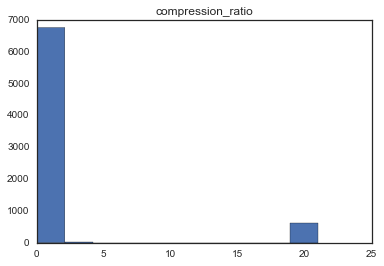

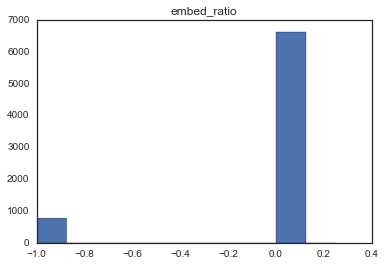

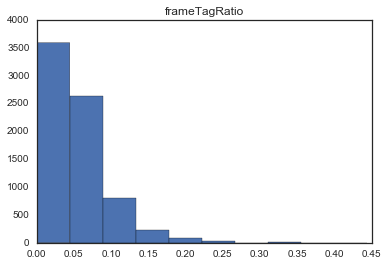

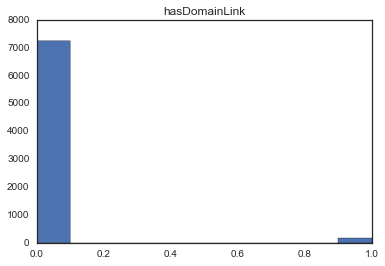

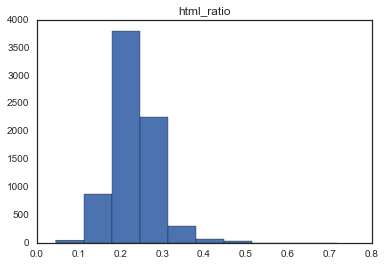

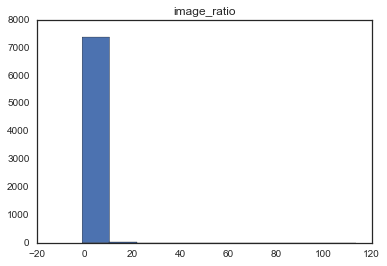

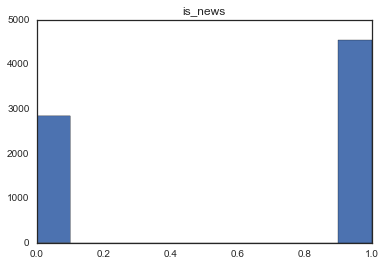

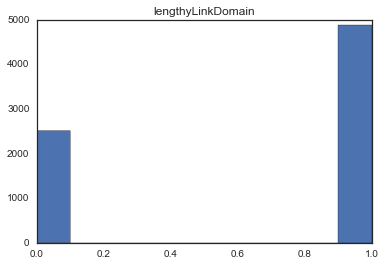

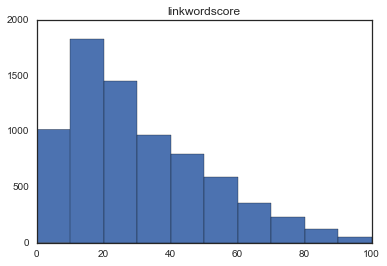

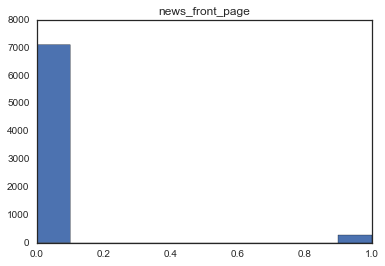

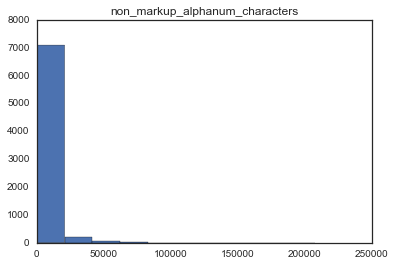

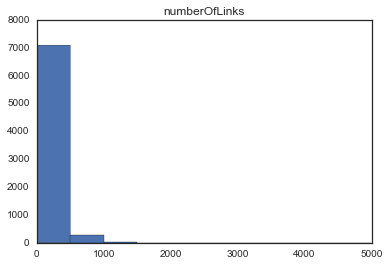

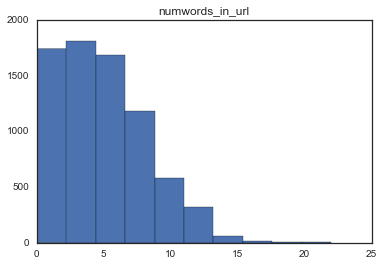

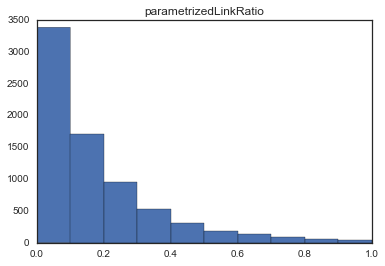

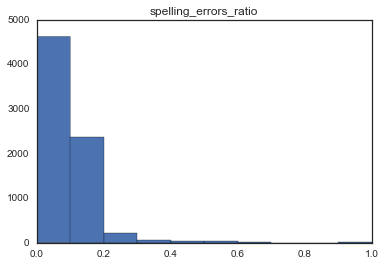

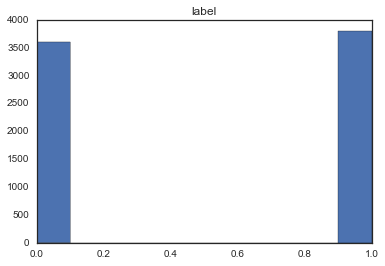

In [290]:
for item in su.describe().columns:
    plt.figure()
    plt.hist(su[item].dropna())
    plt.title(item)

## 3. Use statsmodels' logistic regression function to look at variable significance

The **`import statsmodels.formula.api as smf`** code below gives us access to a statsmodels api that can run logistic regressions using patsy-style formulas.

Ex:

```python
formula = 'target ~ var1 + var2 + C(var3) -1'
logreg = smf.logit(formula, data=data)
logreg_results = logreg.fit()
print logreg_results.summary()
```

---

### 3.1 Run a logistic regression predicting evergreen from the numeric columns

And print out the results as shown in the example above.


---

In [358]:
import statsmodels.formula.api as smf
import statsmodels.api as sm

formula = 'label ~ alchemy_category_score\
+avglinksize \
+commonlinkratio_1\
+commonlinkratio_2\
+commonlinkratio_3\
+commonlinkratio_4\
+compression_ratio\
+embed_ratio\
+frameTagRatio\
+hasDomainLink\
+html_ratio\
+image_ratio\
+is_news\
+lengthyLinkDomain\
+linkwordscore\
+news_front_page\
+non_markup_alphanum_characters\
+numberOfLinks\
+numwords_in_url\
+parametrizedLinkRatio\
+spelling_errors_ratio -1'

logreg = smf.logit(formula, data=su)
logreg_results = logreg.fit()
logreg_results.summary()

Optimization terminated successfully.
         Current function value: 0.651075
         Iterations 5


<class 'statsmodels.iolib.summary.Summary'>
"""
                           Logit Regression Results                           
==============================================================================
Dep. Variable:                  label   No. Observations:                 5053
Model:                          Logit   Df Residuals:                     5032
Method:                           MLE   Df Model:                           20
Date:                Thu, 19 May 2016   Pseudo R-squ.:                 0.05977
Time:                        16:27:38   Log-Likelihood:                -3289.9
converged:                       True   LL-Null:                       -3499.0
                                        LLR p-value:                 3.298e-76
==================================================================================================
                                     coef    std err          z      P>|z|      [95.0% Conf. Int.]
--------------------------------------------------------------------------------------------------
alchemy_category_score            -0.5924      0.138     -4.300      0.000        -0.862    -0.322
avglinksize                        0.0037      0.003      1.167      0.243        -0.003     0.010
commonlinkratio_1                  1.0475      0.272      3.854      0.000         0.515     1.580
commonlinkratio_2                 -0.3261      0.461     -0.708      0.479        -1.229     0.577
commonlinkratio_3                  2.8815      0.881      3.269      0.001         1.154     4.609
commonlinkratio_4                 -1.9829      0.906     -2.190      0.029        -3.758    -0.208
compression_ratio                 -0.0074      0.014     -0.534      0.594        -0.035     0.020
embed_ratio                       -0.4133      0.225     -1.833      0.067        -0.855     0.029
frameTagRatio                     -6.9680      0.962     -7.240      0.000        -8.854    -5.082
hasDomainLink                      0.0460      0.212      0.217      0.829        -0.370     0.462
html_ratio                         3.9605      0.475      8.334      0.000         3.029     4.892
image_ratio                        0.0056      0.015      0.360      0.719        -0.025     0.036
is_news                            0.1115      0.067      1.672      0.094        -0.019     0.242
lengthyLinkDomain                  0.0440      0.076      0.577      0.564        -0.105     0.193
linkwordscore                     -0.0223      0.002    -10.343      0.000        -0.027    -0.018
news_front_page                   -0.4371      0.152     -2.876      0.004        -0.735    -0.139
non_markup_alphanum_characters -2.154e-05   5.94e-06     -3.629      0.000     -3.32e-05 -9.91e-06
numberOfLinks                      0.0016      0.000      5.762      0.000         0.001     0.002
numwords_in_url                   -0.0285      0.010     -2.830      0.005        -0.048    -0.009
parametrizedLinkRatio              0.3147      0.170      1.849      0.064        -0.019     0.648
spelling_errors_ratio             -2.4835      0.557     -4.458      0.000        -3.575    -1.392
==================================================================================================
"""

### 3.2 Run a logistic regression predicting evergreen from the numeric columns and a categorical variable of alchemy_category

And print out the results as shown in the example.

---

In [365]:
#adding categorical variable breaks the model = too many iterations

formula = 'label ~ alchemy_category_score\
+avglinksize \
+commonlinkratio_1\
+commonlinkratio_2\
+commonlinkratio_3\
+commonlinkratio_4\
+compression_ratio\
+embed_ratio\
+frameTagRatio\
+hasDomainLink\
+html_ratio\
+image_ratio\
+is_news\
+lengthyLinkDomain\
+linkwordscore\
+news_front_page\
+non_markup_alphanum_characters\
+numberOfLinks\
+numwords_in_url\
+parametrizedLinkRatio\
+spelling_errors_ratio \
+C(alchemy_category) -1'

logreg_cat = smf.logit(formula, data=su)
logreg_cat_results = logreg_cat.fit(maxiter=10000)
logreg_cat_results.summary()

         Current function value: 0.593381
         Iterations: 10000


/Users/boyan/anaconda/lib/python2.7/site-packages/statsmodels/base/model.py:466: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


<class 'statsmodels.iolib.summary.Summary'>
"""
                           Logit Regression Results                           
==============================================================================
Dep. Variable:                  label   No. Observations:                 5053
Model:                          Logit   Df Residuals:                     5019
Method:                           MLE   Df Model:                           33
Date:                Thu, 19 May 2016   Pseudo R-squ.:                  0.1431
Time:                        16:33:53   Log-Likelihood:                -2998.4
converged:                      False   LL-Null:                       -3499.0
                                        LLR p-value:                5.121e-189
===========================================================================================================
                                              coef    std err          z      P>|z|      [95.0% Conf. Int.]
-----------------------------------------------------------------------------------------------------------
C(alchemy_category)[arts_entertainment]     0.9315      0.268      3.472      0.001         0.406     1.457
C(alchemy_category)[business]               2.3096      0.270      8.564      0.000         1.781     2.838
C(alchemy_category)[computer_internet]      0.4579      0.302      1.514      0.130        -0.135     1.051
C(alchemy_category)[culture_politics]       1.2511      0.281      4.458      0.000         0.701     1.801
C(alchemy_category)[gaming]                 0.9453      0.352      2.689      0.007         0.256     1.634
C(alchemy_category)[health]                 1.7617      0.289      6.103      0.000         1.196     2.327
C(alchemy_category)[law_crime]              1.4045      0.468      3.003      0.003         0.488     2.321
C(alchemy_category)[recreation]             2.2079      0.262      8.419      0.000         1.694     2.722
C(alchemy_category)[religion]               1.2582      0.359      3.509      0.000         0.556     1.961
C(alchemy_category)[science_technology]     1.2225      0.292      4.193      0.000         0.651     1.794
C(alchemy_category)[sports]                 0.1678      0.294      0.571      0.568        -0.408     0.743
C(alchemy_category)[unknown]                1.4636      0.968      1.512      0.131        -0.434     3.361
C(alchemy_category)[weather]              -25.3017   4.19e+05  -6.04e-05      1.000     -8.21e+05  8.21e+05
alchemy_category_score                     -0.5070      0.160     -3.165      0.002        -0.821    -0.193
avglinksize                                 0.0049      0.003      1.413      0.158        -0.002     0.012
commonlinkratio_1                           0.3457      0.292      1.183      0.237        -0.227     0.919
commonlinkratio_2                           0.0697      0.497      0.140      0.888        -0.904     1.043
commonlinkratio_3                           2.5890      0.917      2.824      0.005         0.792     4.386
commonlinkratio_4                          -1.8462      0.937     -1.971      0.049        -3.682    -0.011
compression_ratio                           0.0015      0.015      0.104      0.918        -0.027     0.030
embed_ratio                                -0.3196      0.239     -1.338      0.181        -0.788     0.148
frameTagRatio                              -7.5926      1.021     -7.440      0.000        -9.593    -5.592
hasDomainLink                              -0.1205      0.219     -0.549      0.583        -0.551     0.310
html_ratio                                 -0.2840      0.762     -0.373      0.709        -1.778     1.210
image_ratio                                -0.0018      0.016     -0.114      0.909        -0.033     0.029
is_news                                     0.1541      0.072      2.149      0.032         0.014     0.295
lengthyLinkDomain                           0.0804      0.081      0.992      0.321        -0.078     0.239
l

In [313]:
logreg_results = logreg.fit().summary().as_html()

res = pd.read_html(logreg_results)

res_vars = res[1]


for i in range(1,len(res_vars)):
    if float(res_vars[4][i]) < 0.05:
        print res_vars[0][i]

Optimization terminated successfully.
         Current function value: 0.651075
         Iterations 5
alchemy_category_score
commonlinkratio_1
commonlinkratio_3
commonlinkratio_4
frameTagRatio
html_ratio
linkwordscore
news_front_page
non_markup_alphanum_characters
numberOfLinks
numwords_in_url
spelling_errors_ratio


## 4. Use sklearn to cross-validate the accuracy of the model above

Normalize the numeric and categorical columns of the predictor matrix.

---

In [341]:
su = pd.concat([su, pd.get_dummies((su['alchemy_category']), prefix='alch_cat', prefix_sep='_')], axis=1)

In [342]:
from sklearn.preprocessing import StandardScaler

ncols = []
for item in su.describe().columns:
    ncols.append(item)
    
numerical = su[ncols]

mms = StandardScaler()
ns = mms.fit_transform(numerical)
scaled_cols = ['scaled_'+s for s in ncols]
numerical_scaled = pd.DataFrame(ns, columns = scaled_cols)

In [368]:
from sklearn.cross_validation import train_test_split
from sklearn.cross_validation import cross_val_score
from sklearn.metrics import confusion_matrix, classification_report
from sklearn.linear_model import LogisticRegression

X = []
for item in su.columns:
    X.append(item)
X.remove('alchemy_category')
X.remove('label')

su = su.dropna()
X = su[X]
y = su['label']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=.2)



In [369]:
lr = LogisticRegression()
lr.fit(X_train, y_train)

y_pred = lr.predict(X_test)

In [370]:
pd.DataFrame(zip(X.columns, np.transpose(lr.coef_))).sort_values(1)

,0,1
31,alch_cat_sports,[-1.11432743262]
23,alch_cat_computer_internet,[-0.86066562324]
15,news_front_page,[-0.590062984543]
20,spelling_errors_ratio,[-0.456112660964]
0,alchemy_category_score,[-0.371470409512]
8,frameTagRatio,[-0.365220042893]
21,alch_cat_arts_entertainment,[-0.222423813666]
7,embed_ratio,[-0.19640713704]
25,alch_cat_gaming,[-0.126389963553]
9,hasDomainLink,[-0.124634147182]


In [371]:
cross_val_score(lr,X_test,y_test,cv=12)

array([ 0.69767442,  0.61176471,  0.6547619 ,  0.61904762,  0.69047619,
        0.75      ,  0.70238095,  0.72619048,  0.69047619,  0.69047619,
        0.66666667,  0.64285714])

In [372]:
print classification_report(y_test, y_pred)

             precision    recall  f1-score   support

          0       0.66      0.63      0.64       458
          1       0.70      0.73      0.72       553

avg / total       0.68      0.68      0.68      1011



In [373]:
confusion_matrix(y_test, y_pred)

array([[289, 169],
       [151, 402]])

## 5. Gridsearch regularization parameters for logistic regression

Find the best regularization type (Ridge, Lasso) across a set of regularization strengths.

[NOTE: C is the inverse of the regularization strength. Lower C values are stronger regularization. Having a C higher than 1 will significantly slow down the search. I'm not particularly interested in values over 1, since this is the default regularization strength in LogisticRegression.]

**After you find the best set of parameters, build a Logistic Regression with those parameters and crossvalidate the score.**

[NOTE 2: to run Lasso regularization the solver should be `'liblinear'`]

---

In [374]:
lr_lasso = LogisticRegression(solver='')
lr_ridge = lr.get_params()

{'C': 1.0,
 'class_weight': None,
 'dual': False,
 'fit_intercept': True,
 'intercept_scaling': 1,
 'max_iter': 100,
 'multi_class': 'ovr',
 'n_jobs': 1,
 'penalty': 'l2',
 'random_state': None,
 'solver': 'liblinear',
 'tol': 0.0001,
 'verbose': 0,
 'warm_start': False}

In [413]:
params = {
    'C':[.9,.8,.7,.6,.5,.4,.3,.2,.1,.01],
    'penalty':['l1','l2']
}

In [417]:
from sklearn import grid_search

gs = grid_search.GridSearchCV(lr,params,cv=12)
gs.fit(X,y).best_estimator_


LogisticRegression(C=0.8, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='ovr', n_jobs=1,
          penalty='l1', random_state=None, solver='liblinear', tol=0.0001,
          verbose=0, warm_start=False)

In [420]:
lr = LogisticRegression(C=0.8, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='ovr', n_jobs=1,
          penalty='l1', random_state=None, solver='liblinear', tol=0.0001,
          verbose=0, warm_start=False)

cross_val_score(lr,X_train,y_train)

array([ 0.69362018,  0.67631774,  0.67928731])

## 6. Gridsearch neighbors for kNN

Find the best number of neighbors with your predictors to predict the `label` target variable.

Start by bulding a kNN model with a set number of neighbors, then use gridsearch to run through a series of neighbors.

---

## 7. Choose a new target from alchemy_category to predict with logistic regression

**Ideally your category choice will have a small fraction of the total rows, but not TOO small!**

---

### 7.1 Chose your target category, create the Y vector, and check the fraction of instances

---

### 7.2 Use patsy to create an X matrix of the numeric predictors and all two-way interactions between them

Ex:

```python
import patsy

formula_interactions = '~ (var1 + var2 + var3)**2 -1'
X_interactions = patsy.dmatrix(formula_interactions, data=data
```

Get the column names from the `design_info` property of the patsy X matrix.

---

### 7.3 Normalize the predictor matrix columns

---

### 7.4 Gridsearch a logistic regression to predict accuracy on your new target from the interaction predictors

Include Ridge and Lasso.

---

### 7.5 Build a logistic regression with the optimal parameters, and look at the coefficients

---

### 7.6 Gridsearch parameters for a logistic regression with the same target and predictors, but score based on precision rather than accuracy

Look at the documentation.

---

## [BONUS] 8. Build models predicting from words

This is a bit of the NLP we covered in the pipeline lecture!

---

### 8.1 Choose 'body' or 'title' from the boilerplate to be the basis of your word predictors

You will need to parse the json from the boilerplate field.

---

In [ ]:
import json

### 8.2 Use CountVectorizer to create your predictor matrix from the string column

It is up to you what range of ngrams and features, and whether or not you want the columns binary or counts.

---

### 8.3 Gridsearch a logistic regression predicting accuracy of your chosen target category from word predictor matrix

---

### 8.4 Do the same as above, but score the gridsearch based on precision rather than accuracy

---

### 8.5 Build a logistic regression with optimal precision categories

Print out the top 20 or 25 word features as ranked by their coefficients.

---